# Entrenamiento del dataset CIFAR
* CIFAR es el acrónimo de *Canadian Institute For Advanced Research* y el dataset CIFAR-10 fue desarrollado al igual que el CIFAR-100 por los investigadores del instituto CIFAR[^1]
* El dataset contiene 60.000 imágenes de fotografías en color de resolución 32x32 píxeles clasificadas con 10 clases:
   * 0: aeroplano
   * 1: automóvil
   * 2: pájaro
   * 3: gato
   * 4: ciervo
   * 5: perro
   * 6: rana
   * 7: caballo
   * 8: barco
   * 9: camión

* Cargamos el dataset importando con *cifar10.load_data()*


[^1]: https://en.wikipedia.org/wiki/CIFAR-10

In [1]:
import tensorflow as tf

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


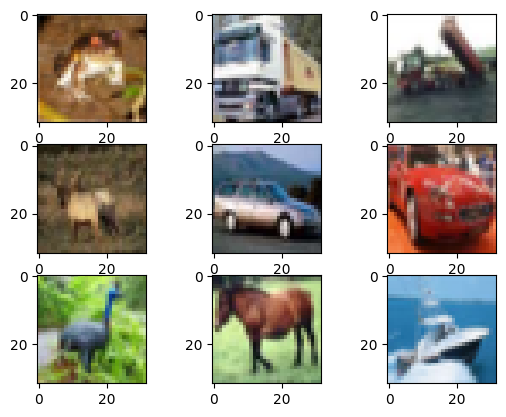

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [ ]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Ejercicios
* Podemos evaluar otras redes distintas de la LeNet-5 conocidas como redes profundas, que son aquellas con muchas más capas
   * VGG19
   * MobileNet
   * ResNet50
   * Más información en https://www.tensorflow.org/api_docs/python/tf/keras/applications


## Ejercicio 2
* Evaluar el rendimiento **score** para otras redes como VGG19 y ResNet50

In [ ]:
from keras.applications import VGG19, ResNet50

## VGG19

In [ ]:
vgg19m = VGG19(weights=None, classes=num_classes, input_shape=(img_rows, img_cols, 3))

vgg19m.summary()

opt_adam = keras.optimizers.Adam(learning_rate=1e-4)
vgg19m.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 38,947,914 (148.57 MB)

 Trainable params: 38,947,914 (148.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
batch_size = 128

vgg19m.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs, verbose=1,
           validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 117ms/step - accuracy: 0.1555 - loss: 2.1348 - val_accuracy: 0.2577 - val_loss: 1.7948
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.2857 - loss: 1.7609 - val_accuracy: 0.3869 - val_loss: 1.5766
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.4349 - loss: 1.4671 - val_accuracy: 0.5208 - val_loss: 1.2739
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.5413 - loss: 1.2254 - val_accuracy: 0.5707 - val_loss: 1.2218
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.6190 - loss: 1.0547 - val_accuracy: 0.6375 - val_loss: 1.0605
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.6878 - loss: 0.8810 - val_accuracy: 0.6772 - val_loss: 0.9204
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.7360 - loss: 0.7533 - val_accuracy: 0.7056 - val_loss: 0.8618
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.7706 - loss: 0

In [ ]:
score = vgg19m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8760966658592224
Test accuracy: 0.7146000266075134


## ResNet50

In [ ]:
resnet50m = ResNet50(weights=None, classes=num_classes, input_shape=(img_rows, img_cols, 3))

resnet50m.summary()

opt_adam = keras.optimizers.Adam(learning_rate=1e-4)
resnet50m.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
epochs = 10
batch_size = 128

resnet50m.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs, verbose=1,
           validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 137ms/step - accuracy: 0.1735 - loss: 2.6235 - val_accuracy: 0.1031 - val_loss: 3.0142
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.3179 - loss: 1.8951 - val_accuracy: 0.3591 - val_loss: 1.7829
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3979 - loss: 1.6638 - val_accuracy: 0.3905 - val_loss: 1.7167
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.4629 - loss: 1.4898 - val_accuracy: 0.4095 - val_loss: 1.6865
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.5161 - loss: 1.3449 - val_accuracy: 0.4414 - val_loss: 1.6209
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5708 - loss: 1.2149 - val_accuracy: 0.4437 - val_loss: 1.5914
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.6122 - loss: 1.0869 - val_accuracy: 0.4539 - val_loss: 1.5962
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.6467 - loss: 0.9928 

In [ ]:
score = resnet50m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8048750162124634
Test accuracy: 0.4507000148296356


## Ejercicio 3
* Evaluar el rendimiento **score** cuando se utiliza el dataset CIFAR pero con **100 clases** para las tres redes consideradas: MobileNet, VGG19 y ResNet50
   * El dataset se puede importar con cifar100.load_data()

In [11]:
from keras.datasets import cifar100
from keras.applications import VGG19, ResNet50
tf.compat.v1.enable_eager_execution()

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

num_classes = 100

labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


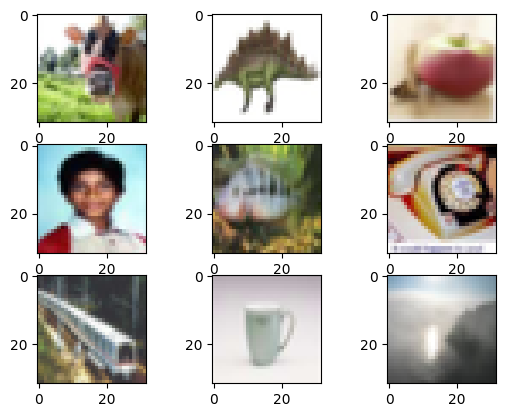

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [13]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## MobileNet

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

modelDL = keras.applications.MobileNet(weights=None, classes=num_classes, input_shape=(img_rows, img_cols,3))

modelDL.summary()

modelDL.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

Model: "mobilenet_1.00_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,331,364 (12.71 MB)

 Trainable params: 3,309,476 (12.62 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
epochs = 10
batch_size = 128

modelDL.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.0143 - loss: 4.7664 - val_accuracy: 0.0100 - val_loss: 4.6446
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0339 - loss: 4.4311 - val_accuracy: 0.0193 - val_loss: 4.6494
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0515 - loss: 4.2830 - val_accuracy: 0.0525 - val_loss: 4.2736
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0702 - loss: 4.1471 - val_accuracy: 0.0623 - val_loss: 4.1807
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0922 - loss: 4.0122 - val_accuracy: 0.0802 - val_loss: 4.0925
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1070 - loss: 3.8884 - val_accuracy: 0.0918 - val_loss: 4.0334
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1287 - loss: 3.7617 - val_accuracy: 0.0987 - val_loss: 3.9773
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1469 - loss: 3.6630 - val_a

In [ ]:
score = modelDL.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.9185094833374023
Test accuracy: 0.11800000071525574


## VGG19

In [15]:
vgg19m = VGG19(weights=None, classes=num_classes, input_shape=(img_rows, img_cols, 3))

vgg19m.summary()

opt_adam = keras.optimizers.Adam(learning_rate=1e-4)
vgg19m.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 39,316,644 (149.98 MB)

 Trainable params: 39,316,644 (149.98 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 10
batch_size = 128

tf.compat.v1.enable_eager_execution()
vgg19m.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs, verbose=1,
           validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 142ms/step - accuracy: 0.0095 - loss: 4.6053 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 102ms/step - accuracy: 0.0095 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.0105 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.0100 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.0097 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.0095 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.0093 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.0100 - loss: 4

In [17]:
score = vgg19m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.605170726776123
Test accuracy: 0.009999999776482582


## ResNet50

In [ ]:
resnet50m = ResNet50(weights=None, classes=num_classes, input_shape=(img_rows, img_cols, 3))

resnet50m.summary()

opt_adam = keras.optimizers.Adam(learning_rate=1e-4)
resnet50m.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,792,612 (90.76 MB)

 Trainable params: 23,739,492 (90.56 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
epochs = 10
batch_size = 128

resnet50m.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs, verbose=1,
           validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 123ms/step - accuracy: 0.0255 - loss: 5.1502 - val_accuracy: 0.0149 - val_loss: 4.8183
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.0927 - loss: 4.0124 - val_accuracy: 0.1063 - val_loss: 3.9265
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.1419 - loss: 3.6896 - val_accuracy: 0.1363 - val_loss: 3.7541
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.1857 - loss: 3.4170 - val_accuracy: 0.1535 - val_loss: 3.7285
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.2318 - loss: 3.1687 - val_accuracy: 0.1731 - val_loss: 3.5224
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.2827 - loss: 2.9063 - val_accuracy: 0.1894 - val_loss: 3.5087
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.3224 - loss: 2.7019 - val_accuracy: 0.1919 - val_loss: 3.5273
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.3770 - loss: 2.4454 

In [ ]:
score = resnet50m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.8158488273620605
Test accuracy: 0.19910000264644623
